# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Capítulo 4: Convolução e filtragem
### Seção 4.2: Convolução unidimensional

In [1]:
import math as m
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Seção 4.2.1: Exemplo de filtragem e remoção de ruído

Na seção 2.3 vimos o exemplo de filtragem do sinal $x(t)=2\cos(2\pi 5t)+0.8\sin(2\pi 12 t)+0.3\cos(2\pi 47t)$, onde as componentes de alta frequência foram removidas diretamente do espectro fazendo $X_k\leftarrow 0,\ \forall k\ge 40$:

In [2]:
T = 1; N = 128; t = np.arange(0, T, 1/N)
x = 2*np.cos(2*m.pi*5*t) + 0.8*np.sin(2*m.pi*12*t) + 0.3*np.cos(2*m.pi*47*t)
X = np.fft.fft(x); W = X; k0 = 40; W[k0:N-k0:1] *= 0; w = np.real(np.fft.ifft(W))

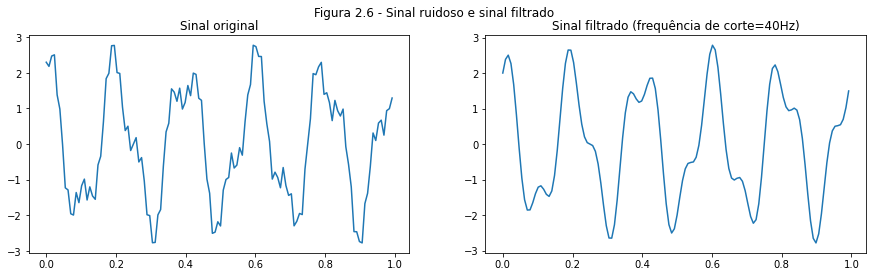

In [3]:
f, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title("Sinal original");ax[0].plot(t,x)
ax[1].set_title("Sinal filtrado (frequência de corte=40Hz)");ax[1].plot(t,w)
f.suptitle("Figura 2.6 - Sinal ruidoso e sinal filtrado");plt.show()

### Métodos de filtragem no domínio do tempo

Queremos considerar como esse tipo de operação poderia ser realizada no domínio do tempo, através de manipulações das amostras $x_n$. Considere o seguinte exemplo, chamado de *filtro da média*: dado um sinal $x$, construímos um novo sinal $w$ pela equação

$$w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1},\ \forall n$$

No caso de um vetor $x\in\mathbb{R}^N$, essa equação apresenta uma dificuldade quando $n=0$:

$$w_0 = \frac{1}{2}x_0+\frac{1}{2}x_{-1}.$$

Faremos como Fourier, e consideraremos $x$ um período de um sinal que se repete a cada $N$ amostras, de tal forma que 

$$x_{-1} = x_{N-1};$$

**Observação:** coincidência ou não, Python usa a mesma convenção!

### Resposta em frequência do filtro

Podemos usar a equação do filtro $w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}$ para estimar como o filtro se comporta em relação a entradas simples. Por exemplo, se

$$x_n = \sin(2\pi qn/N),$$

teremos

$$w_n = \frac{1}{2}\sin(2\pi qn/N)+\frac{1}{2}\sin(2\pi q(n-1)/N)$$

\begin{align*}
	w_n &= \frac{1}{2}\sin(2\pi qn/N)+\frac{1}{2}\sin(2\pi q(n-1)/N)\\
    &= \frac{1}{2}\sin(2\pi qn/N)+\frac{1}{2}\overbrace{\sin((2\pi qn/N)-(2\pi q/N))}^{\sin(\alpha-\beta)=\sin\alpha\cos\beta-\cos\alpha\sin\beta}\\
     &= \frac{1}{2}\sin(2\pi qn/N)+\frac{1}{2}\sin(2\pi qn/N)\cos(2\pi q/N)\\
     &\phantom{= \frac{1}{2}\sin(2\pi qn/N)}\ -\frac{1}{2}\cos(2\pi qn/N)\sin(2\pi q/N)\\
	&= A\sin(2\pi qn/N) - B\cos(2\pi qn/N)
\end{align*}

onde $A = \frac{1}{2} + \frac{1}{2}\cos(2\pi q/N)$ e $B = \frac{1}{2}\sin(2\pi q/N)$.

In [4]:
def entrada_saida_filtro(q,k,line1,line2,fig):
    # x(k) é a q-ésima função "básica"
    x = np.sin(2*m.pi*q*k/N)
    w = 0.5*np.roll(x,1)+0.5*x
    # Mostra a saída do filtro para cada função básica.
    # Observe como a amplitude diminui e a fase inicial
    # também varia.
    line1.set_ydata(x)
    line2.set_ydata(w)
    fig.canvas.draw()
    plt.show()
    time.sleep(0.25)
    # W contém a resposta em magnitude (ou seja, o fator de
    # escala) do filtro para as funções "básicas".
    return np.linalg.norm(w)/np.linalg.norm(x)

<IPython.core.display.Javascript object>


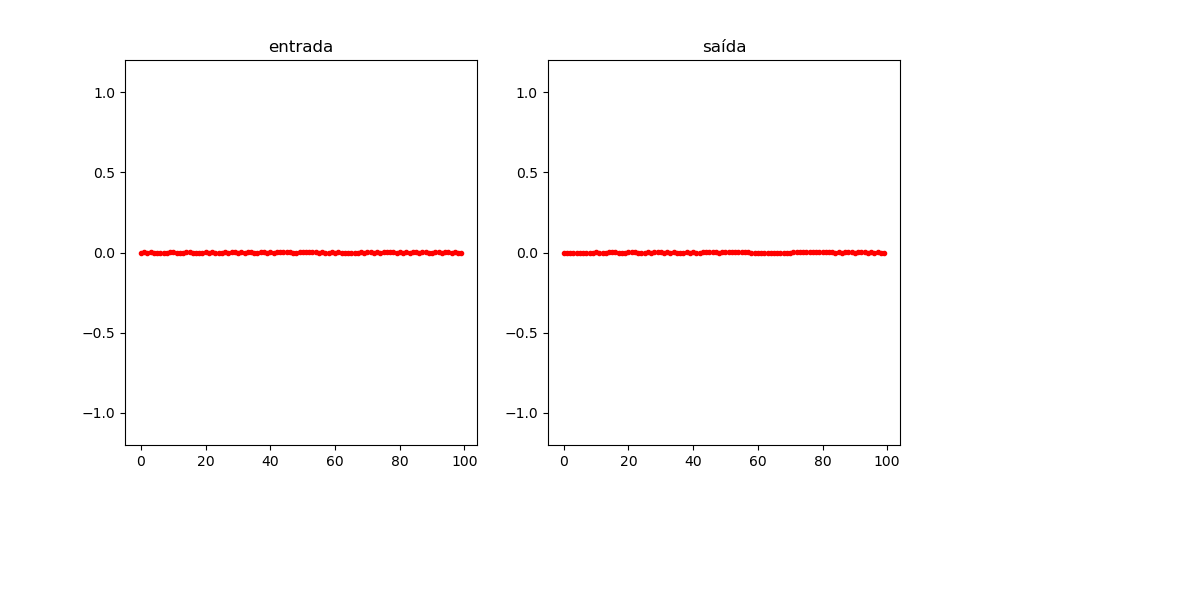

In [5]:
# animação com entradas senoidais e saídas do filtro da média (ver no jupyter)
%matplotlib notebook
N=100;k=np.arange(0,N);W=[1]+[0]*(N//2)
fig , ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("entrada");ax[1].set_title("saída")
ax[0].set_ylim([-1.2,1.2]);ax[1].set_ylim([-1.2,1.2])
w = 0*k;line1, = ax[0].plot(k, w, 'r.');line2, = ax[1].plot(k, w, 'r.')
for q in range(1,N//2+1):
    W[q] = entrada_saida_filtro(q,k,line1,line2,fig)
W[N//2] = 0 # corrige a última magnitude

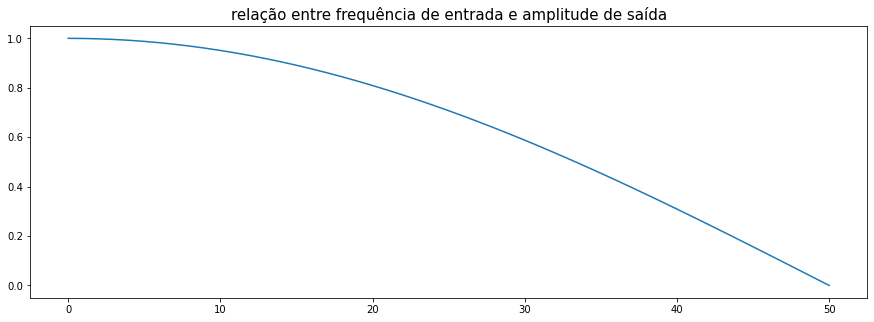

In [6]:
%matplotlib inline
plt.figure(figsize=(15,5));plt.plot(W);
plt.title("relação entre frequência de entrada e amplitude de saída", fontsize=15)
plt.show()

### Resposta complexa em frequência do filtro

Analogamente, podemos usar a equação do filtro

$$w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}$$

para estimar como o filtro se comporta em relação às formas básicas de onda de Fourier

$$x_n = e^{i2\pi qn/N},\ n = 0, 1, \dots, N-1,$$

onde $q = 0, 1, \dots, N-1$.

Nesse caso

\begin{align*}
	w_n & = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}\\
    &= \frac{1}{2}e^{i2\pi qn/N} + \frac{1}{2}e^{i2\pi q(n-1)/N} \\
	&= \frac{1}{2}e^{i2\pi q\left(n-\frac{1}{2}\right)/N}\left[e^{i\pi q\frac{1}{N}} + e^{-i\pi q\frac{1}{N}}\right] \\
	&= \underbrace{\cos\left(\pi q\frac{1}{N}\right)e^{i2\pi q\left(-\frac{1}{2}\right)/N}}_{H_q}\underbrace{e^{i2\pi qn/N}}_{x_n}\\
    & = H_qx_n.
\end{align*}

**Observe** que o fator $H_q = \cos\left(\pi q\frac{1}{N}\right)e^{-i\pi q/N}$, dependente da frequência $q$, equivale a uma atenuação de amplitude

$$|H_q| = \cos\left(\pi q\frac{1}{N}\right)$$

com característica de passa-baixas e uma mudança de fase 

$$\measuredangle H_q = -\pi q/N$$

que corresponde a uma rotação.

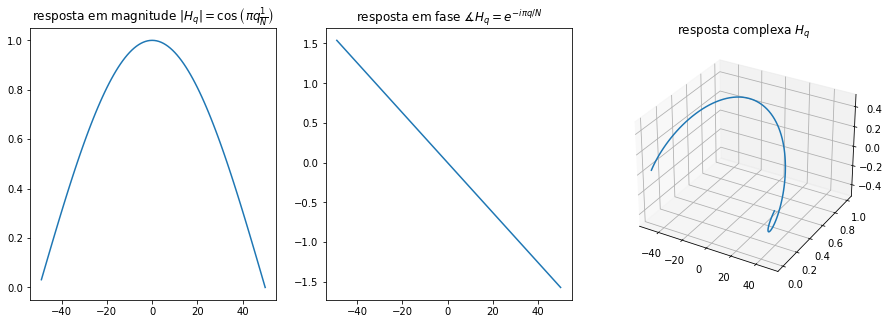

In [7]:
q = np.arange(-N/2+1,+N/2+1);Hq = np.cos(m.pi*q/N)*np.exp(-1j*m.pi*q/N)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1);ax.plot(q,np.abs(Hq));ax.set_title(r"resposta em magnitude $|H_q| = \cos\left(\pi q\frac{1}{N}\right)$")
ax = fig.add_subplot(1, 3, 2);ax.plot(q,np.angle(Hq));ax.set_title(r"resposta em fase $\measuredangle H_q = e^{-i\pi q/N}$")
ax = fig.add_subplot(1, 3, 3, projection='3d');ax.plot3D(q,Hq.real,Hq.imag);ax.set_title(r"resposta complexa $H_q$")
plt.show()

### Exemplo 4.1: Aplicando o filtro da média na função do exemplo na seção 2.3.

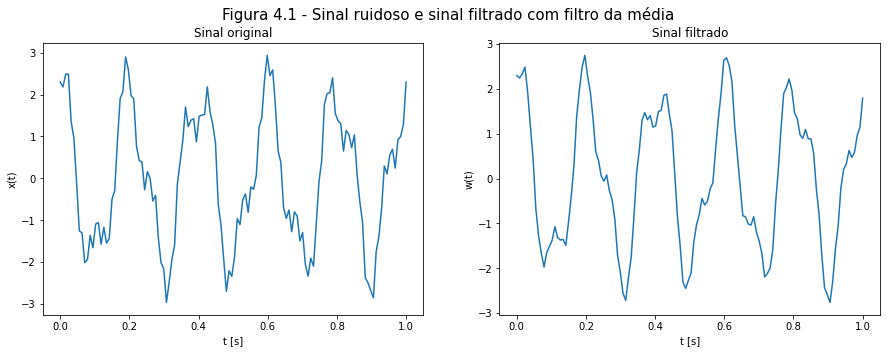

In [8]:
T=1;N=128;t=np.linspace(0,T,N);x = 2*np.cos(2*m.pi*5*t) + 0.8*np.sin(2*m.pi*12*t) + 0.3*np.cos(2*m.pi*47*t)
w = 0.5*(x+np.roll(x,1)) # saída do filtro da média.
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal original");ax[0].plot(t,x);ax[0].set_xlabel('t [s]');ax[0].set_ylabel('x(t)')
ax[1].set_title("Sinal filtrado");ax[1].plot(t,w);ax[1].set_xlabel('t [s]');ax[1].set_ylabel('w(t)')
fig.suptitle("Figura 4.1 - Sinal ruidoso e sinal filtrado com filtro da média", fontsize=15)
plt.show()

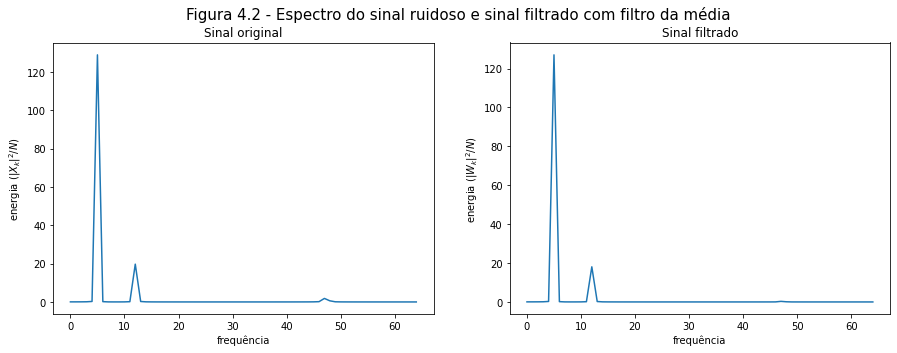

In [9]:
X = np.fft.fft(x);c = X/N;E = N*abs(c)**2
W = np.fft.fft(w);d = W/N;F = N*abs(d)**2
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal original");ax[0].plot(E[:N//2+1]);ax[0].set_xlabel('frequência');ax[0].set_ylabel('energia $(|X_k|^2/N)$')
ax[1].set_title("Sinal filtrado");ax[1].plot(F[:N//2+1]);ax[1].set_xlabel('frequência');ax[1].set_ylabel('energia $(|W_k|^2/N)$')
fig.suptitle("Figura 4.2 - Espectro do sinal ruidoso e sinal filtrado com filtro da média", fontsize=15)
plt.show()

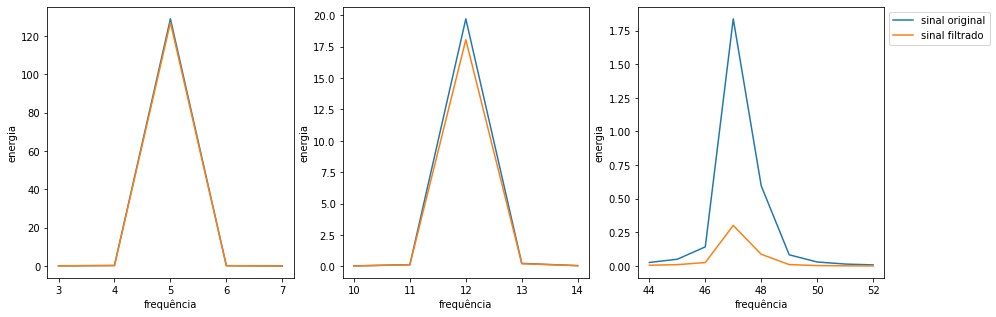

In [10]:
# Como é difícil observar as diferenças dos espectros,
# as 3 figuras a seguir fazem um zoom dos 3 picos dos
# espectros de x (sinal original) e w (sinal filtrado)
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].plot(np.arange(3,8),E[3:8], label='sinal original');ax[0].plot(np.arange(3,8),F[3:8], label='sinal filtrado')
ax[1].plot(np.arange(10,15),E[10:15], label='sinal original');ax[1].plot(np.arange(10,15),F[10:15], label='sinal filtrado')
ax[2].plot(np.arange(44,53),E[44:53], label='sinal original');ax[2].plot(np.arange(44,53),F[44:53], label='sinal filtrado')
ax[0].set_xlabel('frequência');ax[1].set_xlabel('frequência');ax[2].set_xlabel('frequência')
ax[0].set_ylabel('energia');ax[1].set_ylabel('energia');ax[2].set_ylabel('energia')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Formulação matricial do filtro da média

Observe que a equação $w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1},\ n=0,1,\ldots,N-1$ também pode ser escrita como

\begin{align*}
	\begin{pmatrix}
		w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_{N-1}
	\end{pmatrix}
	&= \frac{1}{2}\begin{pmatrix}
		1 & 0 & \dots & \dots & 0 & 1 \\
		1 & 1 & 0 & \dots & \dots & 0 \\
		0 & 1 & 1 & 0 & \dots & 0 \\
		\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
		0 & \dots & \dots & 1 & 1 & 0\\
        0 & \dots & \dots & 0 & 1 & 1
	\end{pmatrix}\begin{pmatrix}
		x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{N-1}
	\end{pmatrix}
\end{align*}

A matriz

$$\frac{1}{2}\begin{pmatrix}
		1 & 0 & \dots & \dots & 0 & 1 \\
		1 & 1 & 0 & \dots & \dots & 0 \\
		0 & 1 & 1 & 0 & \dots & 0 \\
		\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
		0 & \dots & \dots & 1 & 1 & 0\\
        0 & \dots & \dots & 0 & 1 & 1
	\end{pmatrix}$$
    
que aparece na equação anterior é chamada de *matriz circulante* e representa a operação de filtragem e está associada aos coeficientes da equação do filtro.

## Seção 4.2.2: Convolução

Nesta seção vamos considerar que todos os vetores estão em $\mathbb{C}^N$ mas podem ser indexados em qualquer índice inteiro através da extensão periódica:
$$x_k = x_{k\mod N}.$$

### Observação 4.1

Se $x\in\mathbb{C}^N$ é estendido periodicamente, então somatórios de $N$ índices seguidos sempre produzirão o mesmo resultado, ou seja, $\forall m\in\mathbb{Z}$:
$$\sum_{k=0}^{N-1} x_k = \sum_{k=0}^{N-1}x_{k+m} = \sum_{k=m}^{m+N-1}x_k.$$

### Definição de convolução

**Def. 4.2.1:** Se $x, y\in\mathbb{C}^N$, definimos a convolução circular de $x$ e $y$ como o vetor $w\in\mathbb{C}^N$ dado por

\begin{equation*}
	w_n = \sum\limits_{k=0}^{N-1}x_ky_{n-k}
\end{equation*}

e denotamos essa operação por $w=x*y$.

Por exemplo:

\begin{align*}
	w_0: &= \begin{matrix}
		x_0 & x_1 & x_2 & \dots & x_{N-1} \\
		\times & \times & \times & \dots & \times \\
		y_0 & \underbrace{y_{-1}}_{y_{N-1}} & \underbrace{y_{-2}}_{y_{N-2}} & \dots & \underbrace{y_{-N+1}}_{y_1} \\
		\hline
        \end{matrix}\\
		&\quad\quad x_0y_0+x_1y_{N-1}+\cdots x_{N-1}y_1\quad\quad \rightarrow w_0\\
\end{align*}

\begin{align*}
	w_1: &= \begin{matrix}
		x_0 & x_1 & x_2 & \dots & x_{N-1} \\
		\times & \times & \times & \dots & \times \\
		y_1 & y_{0} & \underbrace{y_{-1}}_{y_{N-1}} & \dots & \underbrace{y_{-(N-2)}}_{y_2} \\
		\hline
        \end{matrix}\\
		&\quad\quad x_0y_1+x_1y_0+\cdots x_{N-1}y_2\quad\quad \rightarrow & w_1
\end{align*}

em geral

\begin{align*}
	w_n &= \begin{matrix}
		x_0 & x_1 & x_2 & \dots & x_{N-1} \\
		\times & \times & \times & \dots & \times \\
		y_n & y_{n-1} & y_{n-2} & \dots & y_{n-(N-1)} \\\hline
        \end{matrix}\\
		& \quad\quad x_0y_n+x_1y_{n-1}+\cdots x_{N-1}y_{n-(N-1)} & \rightarrow & w_n
\end{align*}

### Formulação matricial da convolução

Observe que a equação $w_n = \sum\limits_{k=0}^{N-1}x_ky_{n-k},\ n=0,1,\ldots,N-1$ pode ser escrita como

\begin{equation*}
	w = \begin{pmatrix}
		y_0 & y_{N-1} & y_{N-2} & \dots & y_1 \\
		y_1 & y_0 & y_{N-1} & \dots & y_2 \\
		y_2 & y_1 & y_0 & \dots & y_3 \\
		\vdots & \vdots & \vdots & \ddots & \vdots \\
		y_{N-1} & y_{N-2} & y_{N-3} & \dots & y_0 \\
	\end{pmatrix}\begin{pmatrix}
		x_0 \\ x_1 \\ \vdots \\ x_{N-1}
	\end{pmatrix}
\end{equation*}

A matriz

$$M_y = \begin{pmatrix}
		y_0 & y_{N-1} & y_{N-2} & \dots & y_1 \\
		y_1 & y_0 & y_{N-1} & \dots & y_2 \\
		y_2 & y_1 & y_0 & \dots & y_3 \\
		\vdots & \vdots & \vdots & \ddots & \vdots \\
		y_{N-1} & y_{N-2} & y_{N-3} & \dots & y_0 \\
	\end{pmatrix}$$

que aparece na equação $w=M_yx$ é chamada de *matriz circulante para $y$*.

**Observe** que
$$(M_y)_{k,m} = y_{k-m}.$$

### Exemplo 4.2

o filtro da média corresponde à equação $w = x*y$ onde $y_0 = \frac{1}{2}, y_1 = \frac{1}{2}, y_n = 0, \forall n\neq 0, 1$, e
$$M_y = \frac{1}{2}\begin{pmatrix}
		1 & 0 & \dots & \dots & 0 & 1 \\
		1 & 1 & 0 & \dots & \dots & 0 \\
		0 & 1 & 1 & 0 & \dots & 0 \\
		\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
		0 & \dots & \dots & 1 & 1 & 0\\
		0 & \dots & \dots & 0 & 1 & 1
	\end{pmatrix}$$
como visto anteriormente.

### Propriedades da convolução

**Teorema 4.1:** Sejam $x,y,w\in\mathbb{C}^N$ e $a,b\in\mathbb{C}$. Então

\begin{array}{l}
	\mbox{1. Linearidade:}\\
    \hspace{2cm}x*(ay + bw) = a(x*y) + b(x*w)\\
	\mbox{2. Comutatividade:}\\
    \hspace{2cm}x*y = y*x\\
\end{array}

\begin{array}{l}
	\mbox{3. Formulação matricial:}\\
    \hspace{2cm}\mbox{se}\ w = x*y,\ \mbox{então}\ w = M_yx,\ \mbox{onde}\\
	\hspace{2cm}	M_y = \begin{pmatrix}
			y_0 & y_{N-1} & \dots & y_1 \\
			y_1 & y_0 & \dots & y_2 \\
			\vdots & \vdots & \ddots & \vdots \\
			y_{N-1} & y_{N-2} & \dots & y_0 \\
		\end{pmatrix}\\
	\hspace{2cm}\mbox{e além disso}\ M_xM_y = M_{x*y}
\end{array}

\begin{array}{l}
	\mbox{4. Associatividade:}\\
    \hspace{2cm}x*(y*w) = (x*y)*w\\
	\mbox{5. Periodicidade:}\\
    \hspace{2cm}\mbox{se}\ x\ \mbox{e}\ y\ \mbox{são tratados por extensão periódica, então}\\
	\hspace{2cm}w_n = \sum\limits_{k=0}^{N-1}x_k y_{n-k}\\
	\hspace{2cm}\mbox{também está definido}\ \forall n\in\mathbb{Z}\ \mbox{e}\\
	\hspace{2cm}w_n = w_{n\mod N}
\end{array}

### Prova:

\begin{array}{ll}\\
\mbox{1.}&\mbox{Exercício 4.5.}\\
\mbox{2.}&\mbox{Seja}\ w = x*y\ \mbox{onde}\ w_n = \!\sum\limits_{k=0}^{N-1}\!x_ky_{n-k}.\ \mbox{Então}\\
&w_n = \!\sum\limits_{k=0}^{N-1}\!x_ky_{n-k} = \!\!\!\sum\limits_{l=n}^{n-(N-1)}\!\!\!x_{n-l}y_l \\
&\phantom{w_n} \left(= \!\!\sum\limits_{l=0}^{-(N-1)}\!\!x_{n-l}y_l 
= \!\!\sum\limits_{l=N-1}^0\!\!x_{n-l}y_l\right) 
= \!\sum\limits_{l=0}^{N-1}\!x_{n-l}y_l\\
&\mbox{a última expressão corresponde à definição de}\ y*x,\\
&\mbox{logo}\ w = x*y = y*x.
\end{array}

### Prova (cont):

\begin{array}{ll}
\mbox{3.}&\mbox{Já mostramos que}\ x*y=M_yx, \mbox{falta}\ M_xM_y = M_{x*y}:\\
&\hspace{1cm}(M_xM_y)_{k,m} = \sum\limits_{l=0}^{N-1}(M_x)_{k,l}(M_y)_{l,m} \\
&\hspace{1cm}\phantom{(M_xM_y)_{k,m}} = \sum\limits_{l=0}^{N-1}x_{k-l}y_{l-m} 
= \sum\limits_{r=0}^{N-1}x_{(k-r-m)}y_r \\
&\mbox{e note que}\ \sum\limits_{r=0}^{N-1}x_{(k-m)-r}y_r = \sum\limits_{r=0}^{N-1}y_rx_{(k-m)-r} = (y*x)_{k-m}\\
&\phantom{\mbox{e note que}\ \sum\limits_{r=0}^{N-1}x_{(k-m)-r}y_r} = w_{k-m} = (M_w)_{k,m} = (M_{x*y})_{k,m}\\
&\mbox{Logo}\ (M_xM_y)_{k,m} = (M_{x*y})_{k,m}\implies M_xM_y = M_{x*y}.
\end{array}

\begin{array}{ll}
\mbox{4.}&x\!*\!(y\!*\!w) = x\!*\!(M_yw) = M_x(M_y w)\\
&\hspace{1.9cm}= (M_xM_y)w = M_{(x*y)}w\\
&\hspace{1.9cm}= (x\!*\!y)\!*\!w\\
\mbox{5.}& \mbox{Exercício 4.6.}
\end{array}